#### Regression coefficient analysis

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle
import glob
import re 
from pynwb import NWBHDF5IO
import shutil
from IPython.display import display, HTML



file_path = '/root/capsule/data/foraging_nwb_bonsai_processed/662914_2023-09-19/662914_2023-09-19_df_session_logistic_regression_df_beta_Su2022.pkl'

In [7]:
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data.shape)

(1, 31)


In [8]:
# Load in session DataFrame
folder = '/root/capsule/data/filtered_data_session/filtered_data_101724.csv'
df = pd.read_csv(folder)


/tmp/ipykernel_17702/729714511.py:3: DtypeWarning: Columns (6,7,8,26,27,28,29,30,146,147,148,149,150,151,152,153,154,155,156,157,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder)


In [9]:
print(data.info())
print(data.index.names)
print(data.columns.names)

for name in data.index.names:
    print(f"Unique values in {name}:", data.index.get_level_values(name).unique())

for name in data.columns.names:
    print(f"Unique values in {name}:", data.columns.get_level_values(name).unique())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1 entries, ('662914', '2023-09-19', 0) to ('662914', '2023-09-19', 0)
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (RewC, 15.0)  1 non-null      float64
 1   (RewC, 14.0)  1 non-null      float64
 2   (RewC, 13.0)  1 non-null      float64
 3   (RewC, 12.0)  1 non-null      float64
 4   (RewC, 11.0)  1 non-null      float64
 5   (RewC, 10.0)  1 non-null      float64
 6   (RewC, 9.0)   1 non-null      float64
 7   (RewC, 8.0)   1 non-null      float64
 8   (RewC, 7.0)   1 non-null      float64
 9   (RewC, 6.0)   1 non-null      float64
 10  (RewC, 5.0)   1 non-null      float64
 11  (RewC, 4.0)   1 non-null      float64
 12  (RewC, 3.0)   1 non-null      float64
 13  (RewC, 2.0)   1 non-null      float64
 14  (RewC, 1.0)   1 non-null      float64
 15  (UnrC, 15.0)  1 non-null      float64
 16  (UnrC, 14.0)  1 non-null      float64
 17  (UnrC, 13.0)  1 non-null 

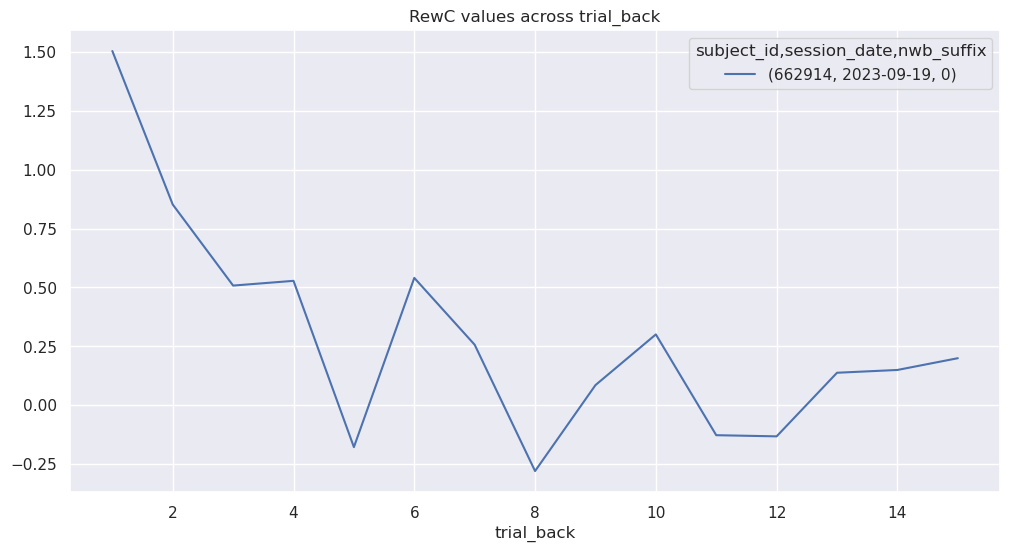

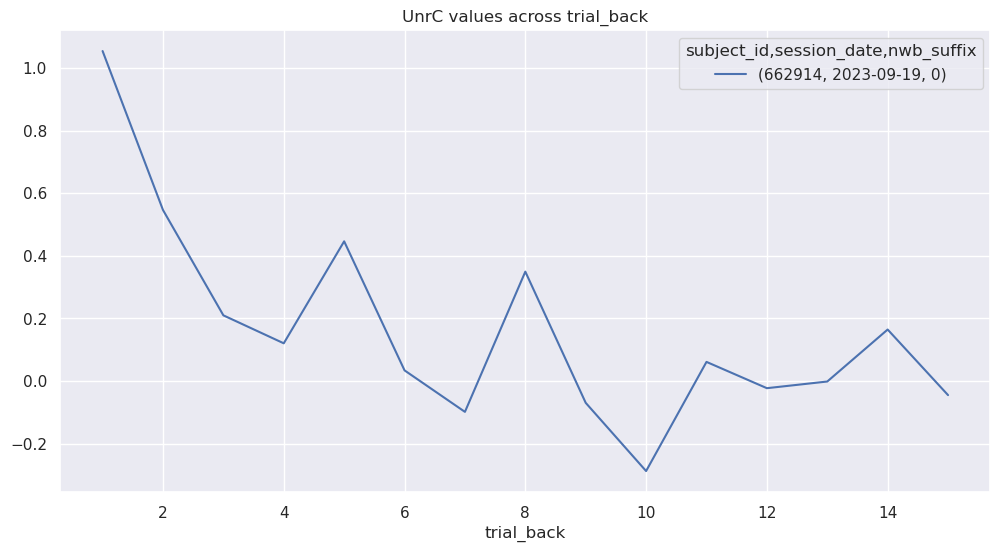

In [10]:
sns.set_theme()

# Plot Rewarded Choice
data['RewC'].T.plot(figsize=(12, 6))
plt.title('RewC values across trial_back')
plt.show()

# Plot Unrewarded Choice
data['UnrC'].T.plot(figsize=(12, 6))
plt.title('UnrC values across trial_back')
plt.show()

In [8]:
def load_pkl_files(base_path):
    """
    Load multiple PKL files from a directory based on the specific folder structure.
    
    :param base_path: The base directory containing subject_id_date folders
    :return: A dictionary of DataFrames, keyed by subject_id_date
    """
    all_data = {}
    
    # Iterate through subject_id_date folders (how pattern is saved in original s3)
    for subject_folder in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject_folder)
        
        # Check if it's a directory
        if os.path.isdir(subject_path):
            # Create expected pattern for filename (specific for Su2022 regression files)
            pkl_filename = f"{subject_folder}_df_session_logistic_regression_df_beta_Su2022.pkl"
            pkl_path = os.path.join(subject_path, pkl_filename)
            
            # Check if the file exists
            if os.path.exists(pkl_path):
                try:
                    # Load the pkl file
                    with open(pkl_path, 'rb') as file:
                        data = pickle.load(file)
                    
                    all_data[subject_folder] = data
                    print(f"Loaded: {pkl_path}")
                except Exception as e:
                    print(f"Error loading {pkl_path}: {str(e)}")
            else:
                print(f"File not found: {pkl_path}")
    
    return all_data

In [9]:
# Example usage - est. time 5min
base_path = '/root/capsule/data/foraging_nwb_bonsai_processed'

loaded_data = load_pkl_files(base_path)

File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-05_151618/1_2024-08-05_151618_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-05_154854/1_2024-08-05_154854_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-09_144109/1_2024-08-09_144109_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-19_113534/1_2024-08-19_113534_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-30_152052/1_2024-08-30_152052_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-09-16_151532/1_2024-09-16_151532_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_202

KeyboardInterrupt: 

In [13]:
print(f'\n loaded {len(loaded_data)} files')

if loaded_data:
    first_key = next(iter(loaded_data))
    first_df = loaded_data[first_key]
    print(first_df.head())


 loaded 5199 files
var                                     RewC                                \
trial_back                                15        14        13        12   
subject_id session_date nwb_suffix                                           
662914     2023-09-19   0           0.199354  0.149425  0.137578 -0.132473   

var                                                                        \
trial_back                                11        10        9        8    
subject_id session_date nwb_suffix                                          
662914     2023-09-19   0          -0.127538  0.300339  0.085108 -0.27977   

var                                                     ...      UnrC  \
trial_back                                7         6   ...        9    
subject_id session_date nwb_suffix                      ...             
662914     2023-09-19   0           0.256459  0.540352  ... -0.069841   

var                                                              

In [14]:
def filter_dict(df_dict, subject_id):
    """
    Filter the dictionary for a specific subject 
    Returns filtered dictionary containng only entries for that subject_id
    """

    filtered_dict = {
        key: df for key, df in df_dict.items()
        if key.split('_')[0] == str(subject_id)
    }

    return filtered_dict


In [15]:
test_subject_dict = filter_dict(loaded_data, '750108')

In [16]:
test_subject_dict.keys()

dict_keys(['750108_2024-09-09_93401', '750108_2024-09-11_91445', '750108_2024-09-12_92141', '750108_2024-09-13_84003', '750108_2024-09-16_92657', '750108_2024-09-18_92113', '750108_2024-09-19_91405', '750108_2024-09-20_90453', '750108_2024-09-25_105008', '750108_2024-09-26_91157', '750108_2024-09-27_94833', '750108_2024-10-02_92408', '750108_2024-10-03_90751', '750108_2024-10-04_91538'])

In [17]:
def extract_coeffs(df_dict, trial_back_value):
    """
    Extract logistic regression coefficients for both rewarded and unrewarded trials. 
    Returns dataframe indexed with dates and columns = RewC or UnrC
    """ 

    dates = []
    rewc_values = []
    unrc_values = []

    for key, df in df_dict.items():

        # Extract date from key 
        date = key.split('_')[-1]

        try:
            rewc_value = df[('RewC', trial_back_value)].iloc[0]
            unrc_value = df[('UnrC', trial_back_value)].iloc[0]

            # Append values
            dates.append(date)
            rewc_values.append(rewc_value)
            unrc_values.append(unrc_value)

        except (KeyError, IndexError) as e:
            print(f'could not find coefficients for {date} at {trial_back_value}')
            print(f'error: {str(e)}')
            continue

    result_df = pd.DataFrame({
        'RewC': rewc_values,
        'UnrC': unrc_values
    }, index=dates)

    result_df.sort_index(inplace=True)

    return result_df

In [18]:
trial_back = 2

result = extract_coeffs(test_subject_dict, trial_back)

In [19]:
# Could iterate through different subjects or trial_back values or could average 
result

,RewC,UnrC
105008,1.111929,0.259977
84003,0.920730,0.479214
90453,0.618723,0.406137
90751,1.141892,0.432058
91157,1.231217,0.706604
91405,0.930635,0.729774
91445,0.675068,0.156020
91538,1.369981,0.501845
92113,0.003310,0.009108
92141,0.661207,0.127738


<Axes: xlabel='None', ylabel='RewC'>

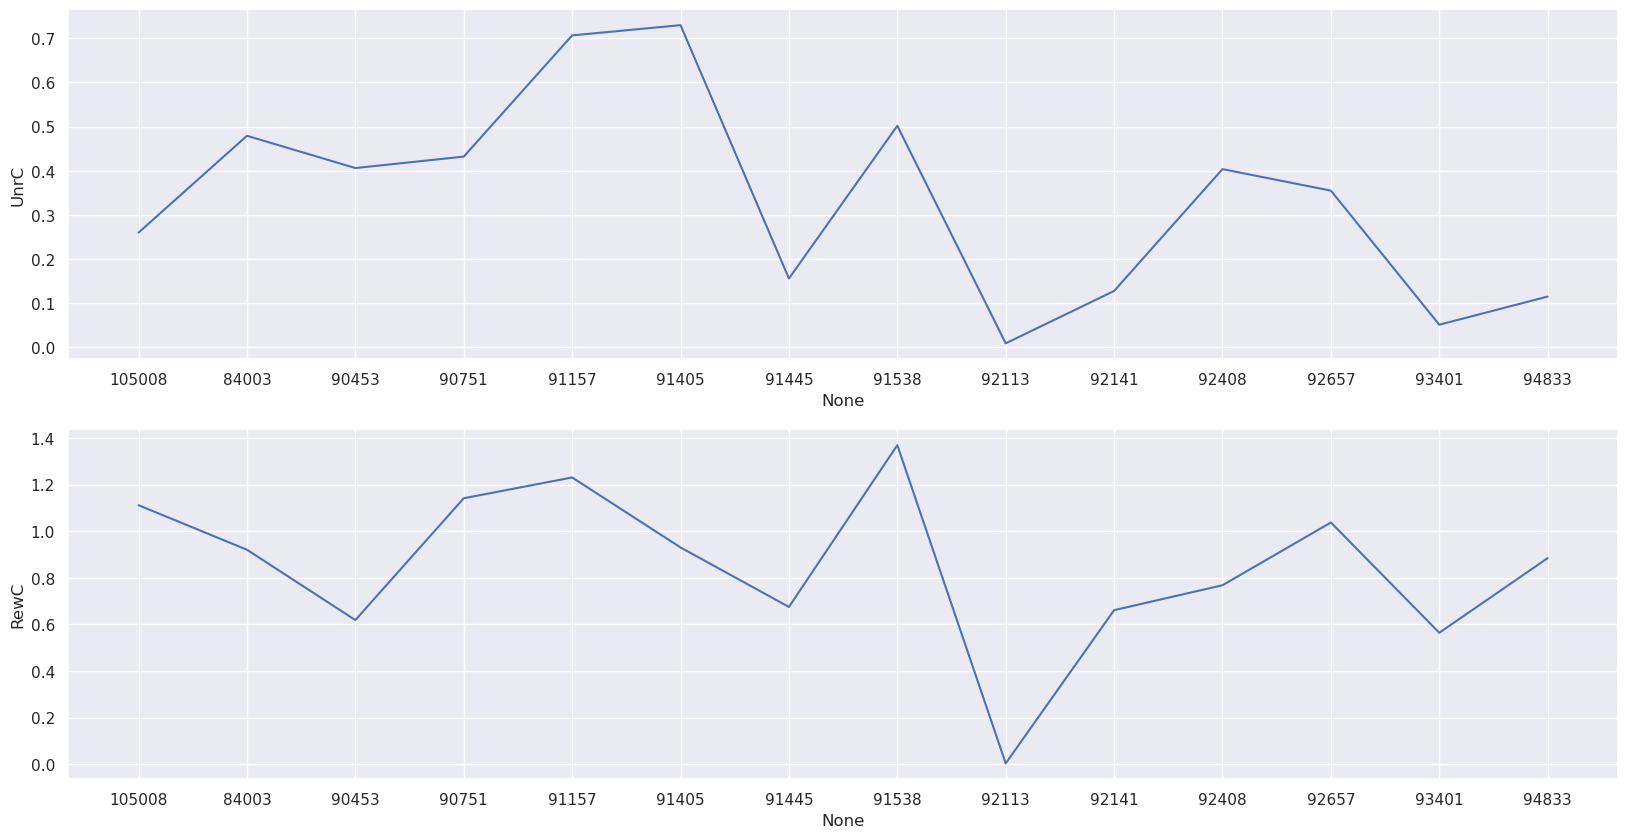

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(data=result, x=result.index, y='UnrC', ax=ax1)

sns.lineplot(data=result, x=result.index, y='RewC', ax=ax2)

In [10]:
# Move pkl files

def copy_move_pkl_files(source_path, destination_path):
    """ 
    Copy all selected pkl files and move them to new folder

    Params:
    source_path (str): Root directory to find pkl files
    destination_path (str): destination for copied and moved pkl files
    """ 

    copied_count = 0

    # Walk through directory
    for root, dirs, files in os.walk(source_path):
        for filename in files:
            if filename.endswith('_df_session_logistic_regression_df_beta_Su2022.pkl'):
                source_file = os.path.join(root, filename)
                destination_file = os.path.join(destination_path, filename)

                try:
                    # Copy the file
                    shutil.copy2(source_file, destination_file)
                    copied_count += 1
                    print(f'Copied: {filename}')
                except Exception as e:
                    print(f'Error copying {filename}: {str(e)}')

                if filename == '769888_2024-11-04_121927_df_session_logistic_regression_df_beta_Su2022.pkl': # Last file 
                    break
                else:
                    continue

    print(f'\nTotal files copied: {copied_count}')

In [11]:
source_path = '/root/capsule/data/foraging_nwb_bonsai_processed'
destination_path = '/root/capsule/data/regression_coeff'

copy_move_pkl_files(source_path, destination_path)

Copied: 662914_2023-09-19_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-09-21_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-09-22_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-09-25_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-09-29_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-10-03_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-10-03_1_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-10-04_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-10-05_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 662914_2023-10-06_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 663612_2023-09-19_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 663612_2023-09-21_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 663612_2023-09-22_df_session_logistic_regression_df_beta_Su2022.pkl
Copied: 66

KeyboardInterrupt: 

In [12]:
# New pipeline

def parse_filename(filename):
    """ 
    Parse filenames to get subject_id, session_date, and nwb_suffix. 

    Params:
    filename (str): Format: {subject_id}_{session_date}_{nwb_suffix}*optional

    Returns:
    tuple: (subject_id, session_date, nwb_suffix)
    """ 

    parts = filename.split('_')
    subject_id = parts[0]
    session_date = parts[1]

    # Edge case when there is no suffix
    nwb_suffix = '_'.join(parts[2:]) if len(parts) > 2 else '0'

    return subject_id, session_date, nwb_suffix

In [18]:
def load_and_process_nwbs(base_path, trial_back_value):
    """ 
    Load nwbs from base path and process regression coefficients into 1 DataFrame with metadata columns 

    Params:
    base_path (str): Directory containing nwb files 
    trial_back_value (int): specified trial back value for analysis 

    Returns:
    combined_df (DataFrame): Combined DataFrame with metadata and coefficient values 
    """ 

    all_data = []

    # Walk through subdirectories 
    for root, dirs, files in os.walk(base_path):
        for filename in files:
            if filename.endswith('_df_session_logistic_regression_df_beta_Su2022.pkl'):
                try:
                    # Extract metatdata 
                    subject_id, session_date, nwb_suffix = parse_filename(filename.replace('_df_session_logistic_regression_df_beta_Su2022.pkl', ''))

                    # Load pkl file
                    file_path = os.path.join(root, filename)
                    with open(file_path, 'rb') as f:
                        df = pickle.load(f)

                    try:
                        # Extract coefficients 
                        rewc_value = df[('RewC', trial_back_value)].iloc[0]
                        unrc_value = df[('UnrC', trial_back_value)].iloc[0]

                        # Create row with metadata and coefficients 
                        row_data = {
                            'subject_id': subject_id,
                            'session_date': session_date,
                            'nwb_suffix': nwb_suffix,
                            'RewC': rewc_value,
                            'UnrC': unrc_value,
                            'trial_back': trial_back_value
                        }

                        all_data.append(row_data)
                        print(f"Extracted values: {file_path}")
                    
                    except (KeyError, IndexError) as e:
                        print(f'Could not extract coefficients from {filename}: {str(e)}')
                        continue

                except Exception as e:
                    print(f'Error processing {filename}: {str(e)}')
                    continue

    combined_df = pd.DataFrame(all_data)
    combined_df.sort_values(['subject_id', 'session_date'], inplace=True)

    return combined_df

In [19]:
base_path = '/root/capsule/data/regression_coeff'
trial_back = 2

combined_df = load_and_process_nwbs(base_path, trial_back)

Extracted values: /root/capsule/data/regression_coeff/662914_2023-09-19_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-09-21_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-09-22_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-09-25_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-09-29_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-10-03_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-10-03_1_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /root/capsule/data/regression_coeff/662914_2023-10-04_df_session_logistic_regression_df_beta_Su2022.pkl
Extracted values: /roo

In [20]:
combined_df

,subject_id,session_date,nwb_suffix,RewC,UnrC,trial_back
0,662914,2023-09-19,0,0.851928,0.546311,2
1,662914,2023-09-21,0,1.229374,0.277566,2
2,662914,2023-09-22,0,0.810232,0.424772,2
3,662914,2023-09-25,0,0.792466,0.352341,2
4,662914,2023-09-29,0,1.734862,0.371538,2
...,...,...,...,...,...,...
5208,764788,2024-11-04,164653,0.488693,-0.401358,2
5209,764790,2024-11-04,100324,0.690863,-0.407655,2
5210,764791,2024-11-04,91855,0.991798,-0.074021,2
5211,769887,2024-11-04,92425,0.003749,0.004213,2


In [25]:
combined_df['session_date'] = pd.to_datetime(combined_df['session_date']) 

def calc_day_idx(group): 
    first_date = group['session_date'].min() 
    group['day_index'] = (group['session_date'] - first_date).dt.days + 1 
    return group 

combined_df = combined_df.groupby('subject_id').apply(calc_day_idx).reset_index(drop=True) 

combined_df


,subject_id,session_date,nwb_suffix,RewC,UnrC,trial_back,day_index
0,662914,2023-09-19,0,0.851928,0.546311,2,1
1,662914,2023-09-21,0,1.229374,0.277566,2,3
2,662914,2023-09-22,0,0.810232,0.424772,2,4
3,662914,2023-09-25,0,0.792466,0.352341,2,7
4,662914,2023-09-29,0,1.734862,0.371538,2,11
...,...,...,...,...,...,...,...
5208,764788,2024-11-04,164653,0.488693,-0.401358,2,7
5209,764790,2024-11-04,100324,0.690863,-0.407655,2,1
5210,764791,2024-11-04,91855,0.991798,-0.074021,2,1
5211,769887,2024-11-04,92425,0.003749,0.004213,2,1


In [47]:
print(combined_df['day_index'].dtype)


int64


In [39]:
print(combined_df['subject_id'].dtype)

combined_df['subject_id'] = pd.to_numeric(combined_df['subject_id'], errors='coerce')
print(combined_df['subject_id'].unique())
print(len(combined_df['subject_id'].unique()))

int64
[662914 663612 668463 668546 668548 668551 671087 676746 676747 680396
 680397 680398 680399 680599 684039 684041 684853 684874 684890 684891
 685641 685642 685983 686868 687069 687070 687552 687553 687582 689329
 689514 689515 689726 689727 689729 689798 689799 690484 690486 690494
 690496 694360 694688 694874 695329 695810 695950 697062 697926 697929
 697930 698694 699364 699979 699982 700708 702200 702204 703548 704151
 704962 705596 705599 706893 707254 707337 707524 707525 707533 707535
 707538 708026 708027 708031 708299 708322 709115 710107 710414 710415
 711039 711041 711042 711254 711256 711281 712028 712031 712634 713310
 713377 713378 713379 713557 713855 713857 713862 714116 714314 714320
 714449 714717 714728 715083 715095 716324 716325 716866 716868 716870
 717121 717259 717263 717375 717377 717378 717379 717474 717531 717535
 717617 719126 719511 720935 720956 721403 722679 722680 722683 722832
 722989 724172 724555 724584 724910 725986 726131 726441 726477 726649


In [48]:
filtered_df

,subject_id,session_date,nwb_suffix,RewC,UnrC,trial_back,day_index
4827,750108,2024-09-09,93401,0.564148,0.051275,2,1
4828,750108,2024-09-11,91445,0.675068,0.156020,2,3
4829,750108,2024-09-12,92141,0.661207,0.127738,2,4
4830,750108,2024-09-13,84003,0.920730,0.479214,2,5
4831,750108,2024-09-16,92657,1.037859,0.354973,2,8
4832,750108,2024-09-18,92113,0.003310,0.009108,2,10
4833,750108,2024-09-19,91405,0.930635,0.729774,2,11
4834,750108,2024-09-20,90453,0.618723,0.406137,2,12
4835,750108,2024-09-25,105008,1.111929,0.259977,2,17
4836,750108,2024-09-26,91157,1.231217,0.706604,2,18


<Axes: xlabel='day_index', ylabel='RewC'>

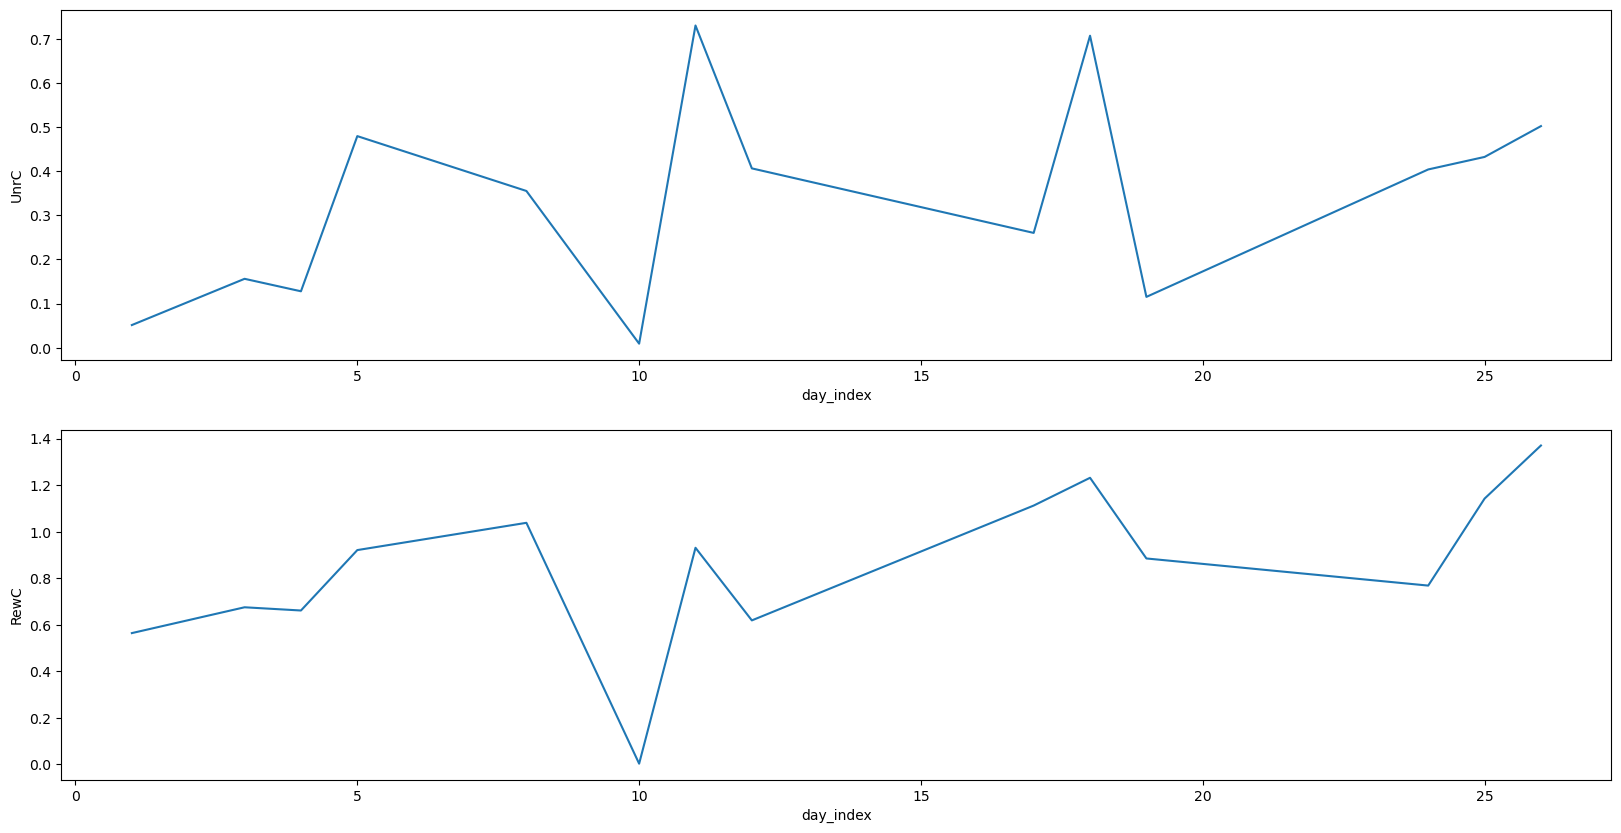

In [51]:
filtered_df = combined_df[combined_df['subject_id'] == 750108]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(data=filtered_df, x='day_index', y='UnrC', ax=ax1)

sns.lineplot(data=filtered_df, x='day_index', y='RewC', ax=ax2)

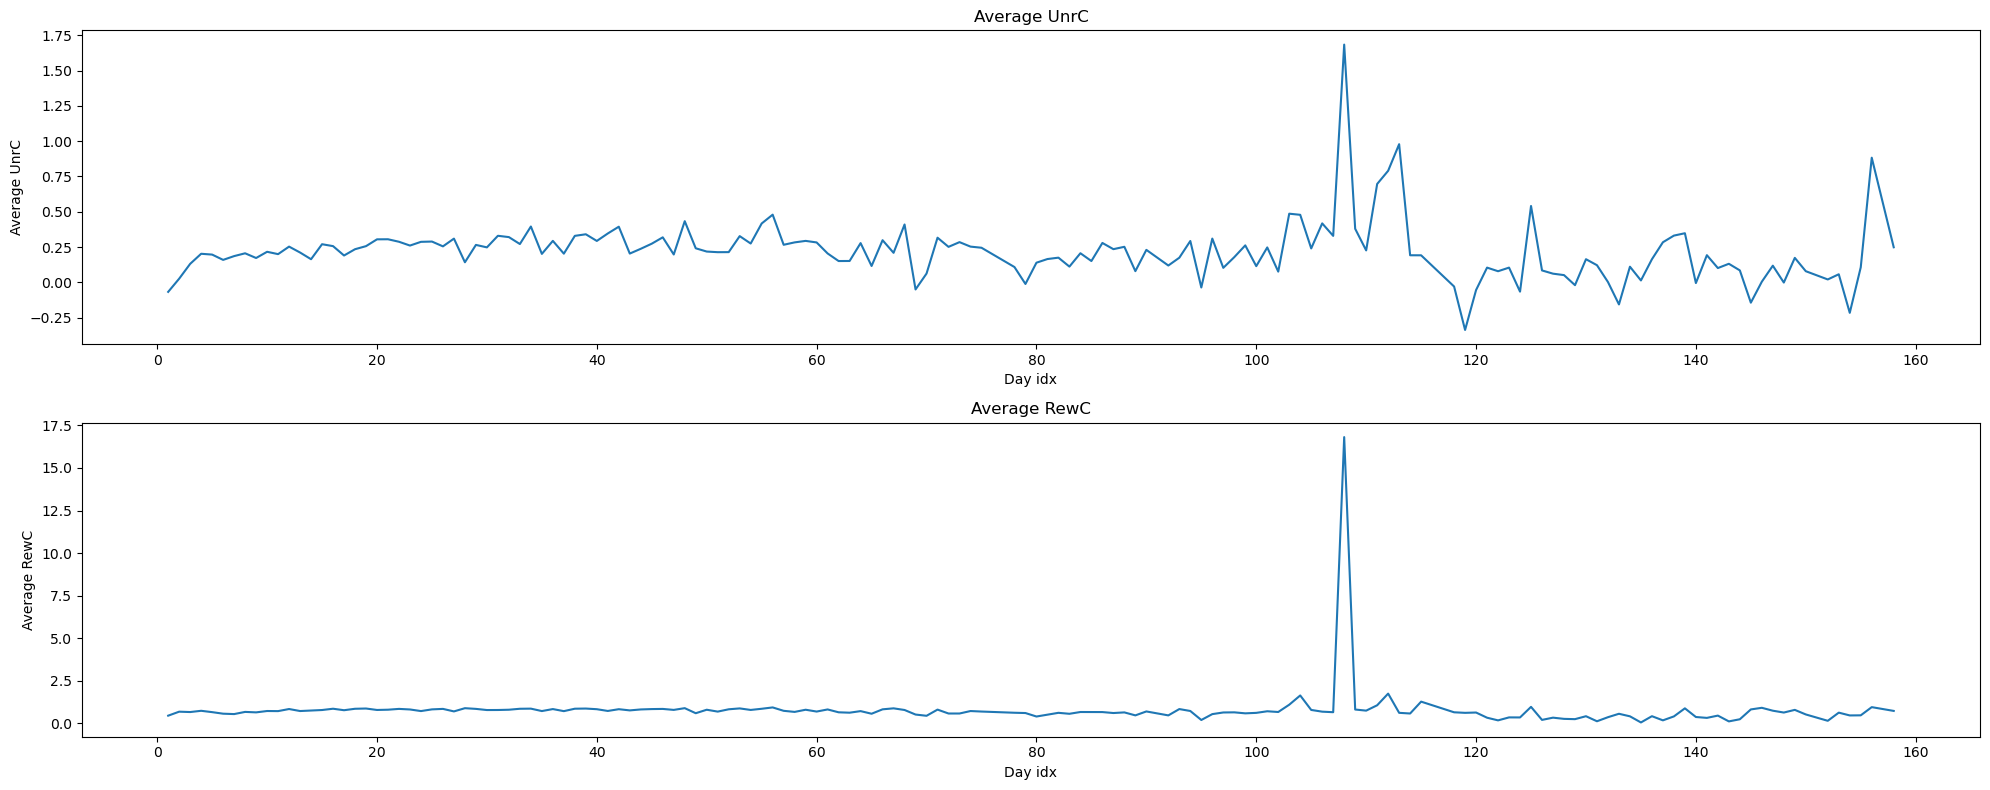

In [55]:
# Simple averaging plot

mean_df = combined_df.groupby('day_index')[['UnrC', 'RewC']].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

sns.lineplot(data=mean_df, x='day_index', y='UnrC', ax=ax1)
ax1.set_title('Average UnrC')
ax1.set_xlabel('Day idx')
ax1.set_ylabel('Average UnrC')

sns.lineplot(data=mean_df, x='day_index', y='RewC', ax=ax2)
ax2.set_title('Average RewC')
ax2.set_xlabel('Day idx')
ax2.set_ylabel('Average RewC')

plt.tight_layout()
plt.show()


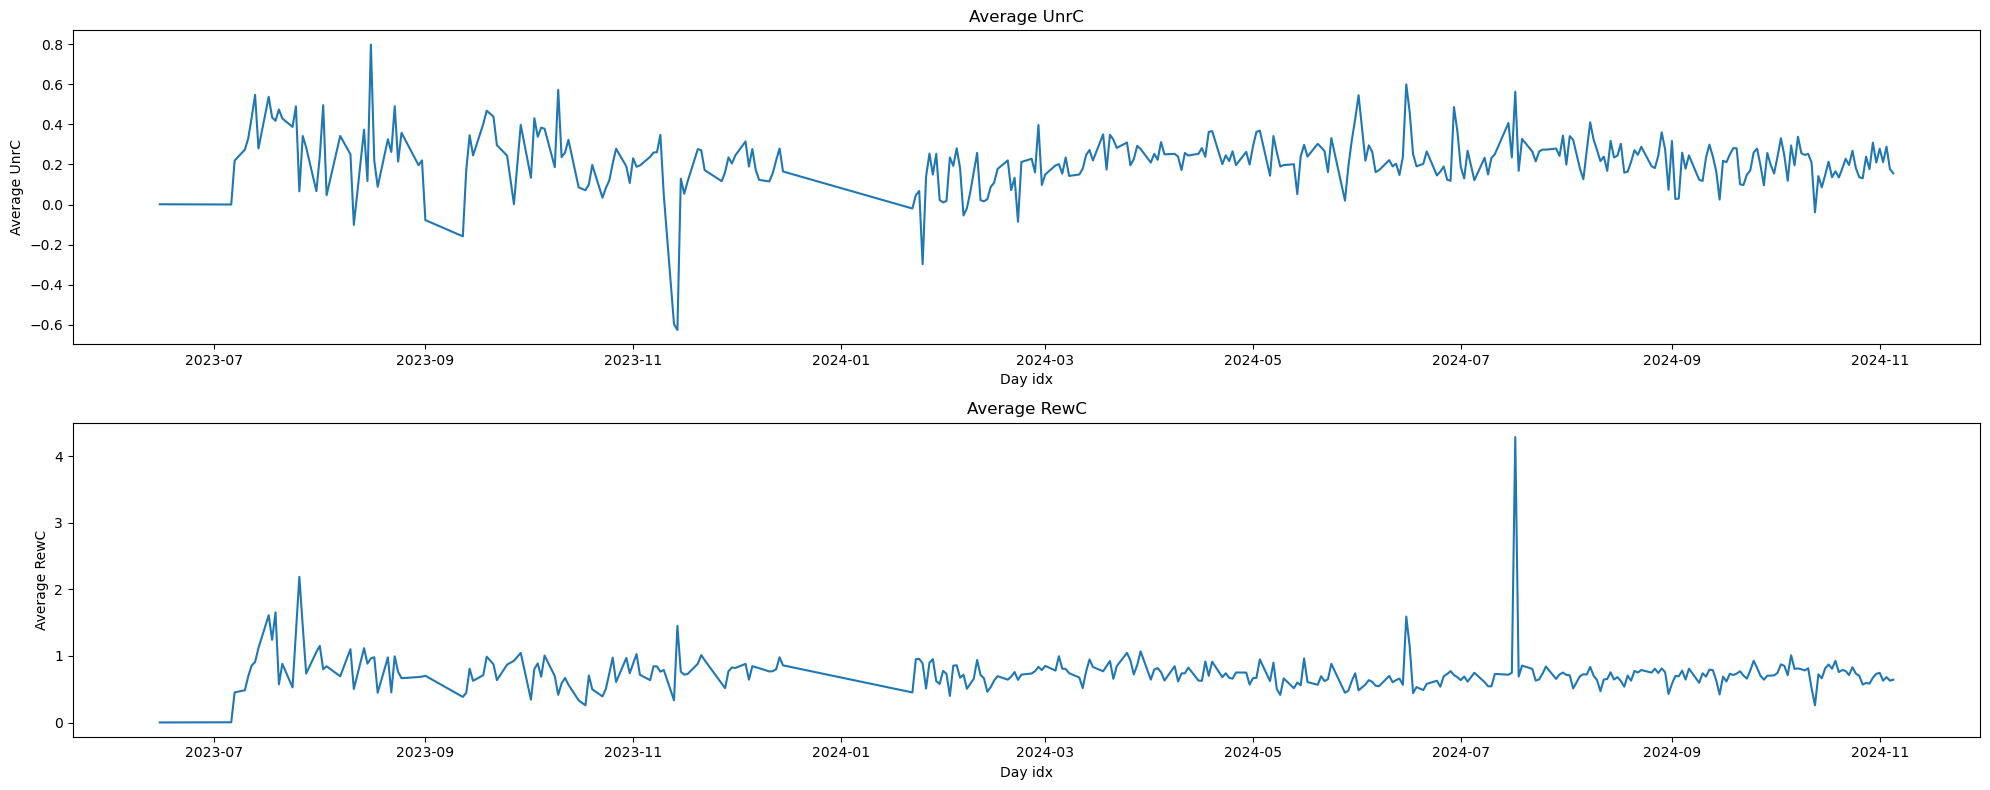

In [56]:
mean_df = combined_df.groupby('session_date')[['UnrC', 'RewC']].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

sns.lineplot(data=mean_df, x='session_date', y='UnrC', ax=ax1)
ax1.set_title('Average UnrC')
ax1.set_xlabel('Day idx')
ax1.set_ylabel('Average UnrC')

sns.lineplot(data=mean_df, x='session_date', y='RewC', ax=ax2)
ax2.set_title('Average RewC')
ax2.set_xlabel('Day idx')
ax2.set_ylabel('Average RewC')

plt.tight_layout()
plt.show()